# 1 Binomial Logistic Regression

## 1.1 Single-Variable Logistic Regression

Suppose we are interested in the survival of passengers on the Titanic. In particular, suppose we want to know whether a passenger's gender impacted whether or not they survived. We can investigagte this using logistic regression.

In [6]:
library(ggplot2)
library(broom)
library(tidyverse)

url <- "https://raw.githubusercontent.com/bcbi-edu/c_introR_2019/master/data/titanic_subset.csv"

titanic <- read_csv(url)


Parsed with column specification:
cols(
  passenger_id = col_double(),
  survived = col_double(),
  pclass = col_double(),
  name = col_character(),
  sex = col_character(),
  age = col_double(),
  sibsp = col_double(),
  parch = col_double(),
  ticket = col_character(),
  fare = col_double(),
  cabin = col_character(),
  embarked = col_character()
)


In [17]:
fm1 <- glm(survived ~ sex, titanic, family = binomial(link = "logit"))

In [18]:
tidy(fm1)

term,estimate,std.error,statistic,p.value
(Intercept),1.056589,0.1289864,8.191477,2.580394e-16
sexmale,-2.513710,0.1671782,-15.036107,4.258662e-51


In [23]:
glance(fm1)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
1186.655,890,-458.902,921.8039,931.3886,917.8039,889


In [20]:
# Define a function to compute the inverse logit. 
# Recall this is our link function.

invlogit <- function(eta) {
    res <- 1/(1 + exp(-eta))
    return(res)
}

In [21]:
beta0 <- tidy(fm1)$estimate[1]
beta1 <- tidy(fm1)$estimate[2]

invlogit(beta0 + beta1 * 0)        # estimated Pr(survived | female)
invlogit(beta0 + beta1 * 1)        # estimated Pr(survived | male)

[1] 0.7420382

[1] 0.1889081

*** Note that the `fitted()` function can be used to obtain predicted probabilities instead of using `invlogit()`

---

---

## 1.2 Why do we Need Logistic Regression?

In [ ]:
# Simulate some data
n <- 500
beta0 <- 1.2
beta1 <- 0.7

x <- rnorm(n)           

pr <- invlogit(beta0 + beta1*x)

y <- rbinom(n, 1, pr)


dat <- data.frame(y, x)

# Compare linear regression to logistic; find that 
# logistic does better job of recovering betas
tidy(lm(y ~ x, dat))
tidy(glm(y ~ x, dat, family = binomial(link = "logit")))


---

---

## 1.3 Multivariate Binomial Logistic Regression

Suppose now we want to investigate the effect of both sex and age on survival. We use the model below. 

In [ ]:
fm2 <- glm(survived ~ sex + age, titanic, family = binomial(link = "logit"))

In [ ]:
tidy(fm2)

---

---

## 1.4 Logistic Regression with Interaction

In [24]:
fm3 <- glm(survived ~ sex + age + age*sex, titanic, family = binomial(link = "logit"))

tidy(fm3)

term,estimate,std.error,statistic,p.value
(Intercept),0.59380093,0.31032443,1.913484,0.055686078
sexmale,-1.31775110,0.40842445,-3.226426,0.001253468
age,0.01970198,0.01057286,1.863449,0.062399191
sexmale:age,-0.04111845,0.01355105,-3.034336,0.002410658


Warning message:
“Removed 177 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 177 rows containing missing values (geom_point).”

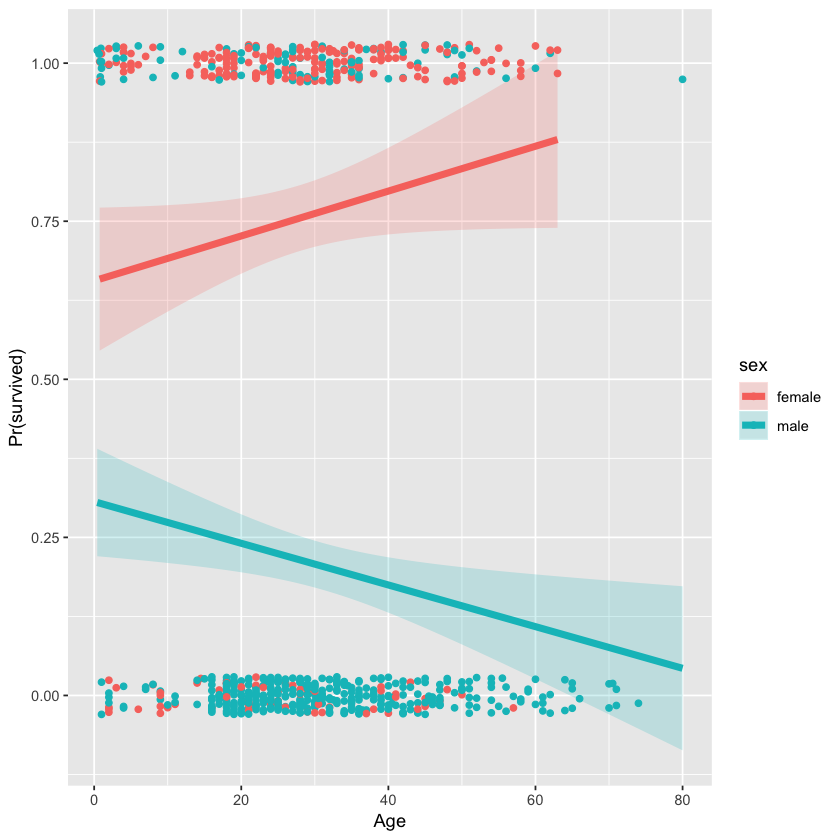

In [25]:
ggplot(titanic, aes(x = age, y = as.numeric(survived), color = sex)) +
    stat_smooth(method = "glm", alpha = 0.2, size = 2, aes(fill = sex)) +
    geom_point(position=position_jitter(height = 0.03, width = 0)) +
    xlab("Age") + 
    ylab("Pr(survived)")

---

---

## 1.5 Predictions using Fitted Model

In [22]:
fm2 <- glm(survived ~ age, titanic, family = binomial(link = "logit"))

predict(fm2, newdata=data.frame(age = 90), type = "response")

1 
0.2604879

---

---

# 2 Poisson Regression

## 2.1 Poisson Model for Number of Procedures

Suppose we want to model the number of procedure for diabetes patients admitted to the hospital. We use several Poisson models below.

In [29]:
library(tidyverse)

dia <- read_csv("../data/diabetes_data_clean.csv")

ERROR: Error: '../data/diabetes_data_clean.csv' does not exist in current working directory ('/Users/pstey/projects_code/intro_r_course/Course-Notes/generalized_linear_models').


In [28]:
spec(dia)

ERROR: Error in inherits(x, "tbl_df"): object 'dia' not found


In [ ]:
fm5 <- glm(num_procedures ~ number_diagnoses, dia, family = poisson(link = "log"))

In [ ]:
tidy(fm5)

In [ ]:
glance(fm5)

In [ ]:
dia_subset <- sample_frac(dia, 0.2)

ggplot(dia_subset, aes(x = number_diagnoses, y = num_procedures)) +
    geom_jitter(alpha = 0.3)

In [ ]:
fm6 <- glm(num_procedures ~ number_diagnoses + num_medications + number_diagnoses*num_medications, dia, family = poisson(link = "log"))

In [ ]:
tidy(fm6)

In [ ]:
ggplot(dia_subset, aes(x = number_diagnoses, y = num_procedures, colour = num_medications)) +
    geom_jitter(alpha = 0.5) + 
    stat_smooth(method = "glm")